In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm

In [7]:
file = 'mathStatics_lab1.xlsx'

df = pd.read_excel(file)
x_i = np.array(df).round(2)
x_i = np.array(sorted(x_i))


def create_frequency_table(x, n):
    frequency_table = dict()
    for i in range(n):
        d_j = x_i[0] + np.round((sample_range*i)/n, 2)
        d_j1 = x_i[0] + np.round(sample_range*(i + 1)/n, 2)
        
        if i != n - 1:
            frequency_table[f"({np.round(d_j, 2)}; {np.round(d_j1, 2)})"] = [np.round((d_j1 + d_j)/2, 3),
                                                                np.count_nonzero((x_i >= d_j) & (x_i < d_j1)),
                                                                np.count_nonzero((x_i >= d_j) & (x_i < d_j1))/len(x_i),
                                                                np.round(np.count_nonzero((x_i >= d_j) & (x_i < d_j1))/(len(x_i)*sample_range/n), 4),
                                                                np.count_nonzero((x_i >= x_i[0]) & (x_i < d_j1)),
                                                                np.count_nonzero((x_i >= x_i[0]) & (x_i < d_j1))/len(x_i)
                                                                ]
        else:
            frequency_table[f"({np.round(d_j, 2)}; {np.round(d_j1, 2)})"] = [(d_j1 + d_j)/2,
                                                                np.count_nonzero((x_i >= d_j) & (x_i < d_j1)) + 1,
                                                                (np.count_nonzero((x_i >= d_j) & (x_i < d_j1)) + 1)/len(x_i),
                                                                np.round((np.count_nonzero((x_i >= d_j) & (x_i < d_j1)) + 1)/(len(x_i)*sample_range/n), 4),
                                                                np.count_nonzero((x_i >= x_i[0]) & (x_i < d_j1)) + 1,
                                                                (np.count_nonzero((x_i >= x_i[0]) & (x_i < d_j1)) + 1)/len(x_i),
                                                               ]
    
    frequency_table = pd.DataFrame.from_dict(frequency_table, orient='index').reset_index()
    frequency_table.columns = ["Разряд", "Середина разряда", "Частота", "Относительные частоты", "Высота гистограммы", "Накопленная частота", "Относит. накопленная частота"]
    return frequency_table






In [10]:
frequency_table = create_frequency_table(x_i, 7)
print(frequency_table)

               Разряд Середина разряда  Частота  Относительные частоты   
0   ([-9.5]; [-4.09])         [-6.795]        5                   0.10  \
1   ([-4.09]; [1.33])          [-1.38]        5                   0.10   
2    ([1.33]; [6.74])          [4.035]        8                   0.16   
3   ([6.74]; [12.15])          [9.445]       15                   0.30   
4  ([12.15]; [17.56])         [14.855]        9                   0.18   
5  ([17.56]; [22.98])          [20.27]        5                   0.10   
6  ([22.98]; [28.39])         [25.685]        3                   0.06   

  Высота гистограммы  Накопленная частота  Относит. накопленная частота  
0           [0.0185]                    5                          0.10  
1           [0.0185]                   10                          0.20  
2           [0.0296]                   18                          0.36  
3           [0.0554]                   33                          0.66  
4           [0.0333]                 

In [11]:
print(f"Математическое ожидание: {np.mean(x_i)}")
print(f"Дисперсия смещенная: {np.var(x_i, ddof=0)}")
print(f"Дисперсия несмещенная: {np.var(x_i, ddof=1)}")
print(f"Медиана: {np.median(x_i)}")

Математическое ожидание: 8.8466
Дисперсия смещенная: 77.36111444
Дисперсия несмещенная: 78.93991269387755
Медиана: 9.215


In [32]:
m = sum([frequency_table['Середина разряда'][i] * frequency_table['Частота'][i] for i in range(7)])/len(x_i)
print(f"Математическое ожидание: {m}")
D = sum([(frequency_table['Середина разряда'][i] - m)**2*frequency_table['Частота'][i] for i in range(7)])/len(x_i)
print(f"Дисперсия: {D}")
print(f"Дисперсия исправленная: {len(x_i)/(len(x_i)-1)*D}")
med_df = frequency_table.iloc[3]
print(f"Медиана: {float(med_df['Разряд'][2:6]) + (((len(x_i)/2 - frequency_table['Частота'][:3].sum())/med_df['Частота'])) * 5.41}")
m = frequency_table['Частота'].idxmax()
mode_df = frequency_table.iloc[m]
print(f"Мода: {float(mode_df['Разряд'][2:6]) + (mode_df['Частота'] - frequency_table['Частота'][m-1])/(2*mode_df['Частота']- frequency_table['Частота'][m-1] - frequency_table['Частота'][m+1]) * 5.41}")

Математическое ожидание: [8.9036]
Дисперсия: [75.29218104]
Дисперсия исправленная: [76.82875616]
Медиана: 9.264666666666667
Мода: 9.653076923076924


In [13]:
sample_range = np.round(x_i[-1] - x_i[0], 2) 
print(f"Размах выборки: {sample_range}")

Размах выборки: [37.89]


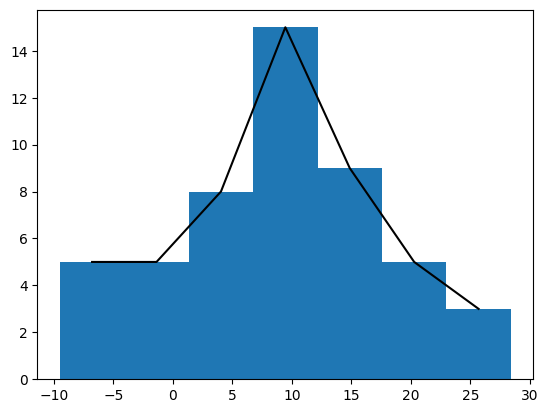

In [14]:
plt.hist(x_i, bins=7)
plt.plot([i for i in frequency_table["Середина разряда"].to_list()], [i for i in frequency_table["Частота"].to_list()], color="black")
plt.show()

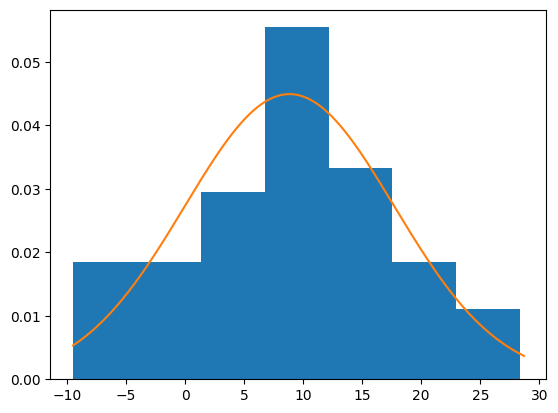

In [15]:
plt.hist(x_i, bins=7, weights=np.ones_like (x_i) / (len(x_i)*5.41))
x = np.arange(-9.5, 28.8, 0.1)
plt.plot(x, norm.pdf(x, 8.84, 8.88))
plt.show()

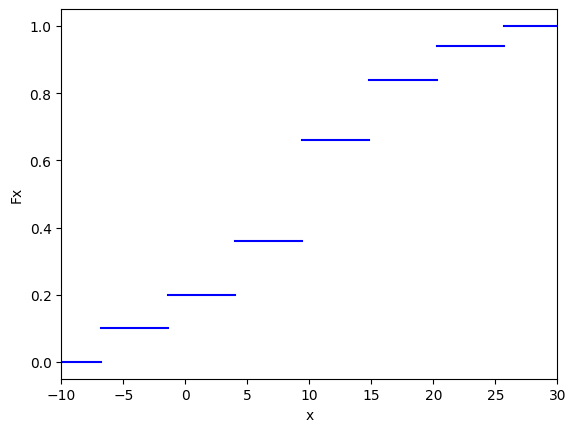

In [16]:
plt.plot([-10, float(frequency_table["Середина разряда"].to_list()[0])],
         [0, 0], c="blue")

for i in range(6):
    plt.plot([frequency_table["Середина разряда"].to_list()[i], frequency_table["Середина разряда"].to_list()[i+1]],
             [frequency_table["Относит. накопленная частота"].to_list()[i], frequency_table["Относит. накопленная частота"].to_list()[i]], c="blue")
    
plt.plot([float(frequency_table["Середина разряда"].to_list()[6]), 30],
         [frequency_table["Относит. накопленная частота"].to_list()[6], frequency_table["Относит. накопленная частота"].to_list()[6]], c="blue")

plt.xlim([-10, 30])
plt.ylabel("Fx")
plt.xlabel("x")
plt.show()